# Exploratory Data Analysis - Gas Monitoring Dataset
## AIAP Batch 21 Technical Assessment

**Objective**: Analyze environmental sensor data to predict Activity Levels of elderly residents for ElderGuard Analytics early warning system.

In [1]:
# Cell 1: Import libraries and setup
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Cell 2: Download and load database
url = "https://techassessment.blob.core.windows.net/aiap21-assessment-data/gas_monitoring.db"
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)
db_path = data_dir / "gas_monitoring.db"

if not db_path.exists():
    response = requests.get(url)
    db_path.write_bytes(response.content)
    print(f"Database downloaded to {db_path}")
else:
    print(f"Database already exists at {db_path}")

Database already exists at data\gas_monitoring.db


In [4]:
# Cell 3: Load data from gas_monitoring table
conn = sqlite3.connect(db_path)
df = pd.read_sql_query("SELECT * FROM gas_monitoring", conn)
conn.close()

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (10000, 14)
Columns: ['Time of Day', 'Temperature', 'Humidity', 'CO2_InfraredSensor', 'CO2_ElectroChemicalSensor', 'MetalOxideSensor_Unit1', 'MetalOxideSensor_Unit2', 'MetalOxideSensor_Unit3', 'MetalOxideSensor_Unit4', 'CO_GasSensor', 'Session ID', 'HVAC Operation Mode', 'Ambient Light Level', 'Activity Level']


,Time of Day,Temperature,Humidity,CO2_InfraredSensor,CO2_ElectroChemicalSensor,MetalOxideSensor_Unit1,MetalOxideSensor_Unit2,MetalOxideSensor_Unit3,MetalOxideSensor_Unit4,CO_GasSensor,Session ID,HVAC Operation Mode,Ambient Light Level,Activity Level
0,morning,19.63,53.83,125.49,571.09,478.55,735.85,497.59,565.05,medium,7241,off,very_dim,Low Activity
1,morning,19.66,53.69,126.34,575.79,491.96,740.28,NaN,557.08,low,7241,ventilation_only,bright,Low Activity
2,night,20.95,54.12,119.34,556.53,437.50,718.34,NaN,612.62,medium,9385,off,None,Low Activity
3,morning,20.10,50.48,113.50,NaN,515.14,744.02,676.15,600.22,low,7241,eco_mode,very_bright,High Activity
4,morning,19.89,48.42,92.77,613.65,535.66,770.27,720.27,625.73,low,7241,Heating_active,moderate,Low Activity


In [5]:
# Cell 4: Basic data overview
print("Dataset Info:")
df.info()
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nDuplicates: {df.duplicated().sum()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time of Day                10000 non-null  object 
 1   Temperature                10000 non-null  float64
 2   Humidity                   10000 non-null  float64
 3   CO2_InfraredSensor         10000 non-null  float64
 4   CO2_ElectroChemicalSensor  9294 non-null   float64
 5   MetalOxideSensor_Unit1     10000 non-null  float64
 6   MetalOxideSensor_Unit2     10000 non-null  float64
 7   MetalOxideSensor_Unit3     7434 non-null   float64
 8   MetalOxideSensor_Unit4     10000 non-null  float64
 9   CO_GasSensor               8631 non-null   object 
 10  Session ID                 10000 non-null  int64  
 11  HVAC Operation Mode        10000 non-null  object 
 12  Ambient Light Level        7468 non-null   object 
 13  Activity Level             10000 

In [6]:
print("Missing value analysis:")
missing_cols = ['CO2_ElectroChemicalSensor', 'MetalOxideSensor_Unit3', 'CO_GasSensor', 'Ambient Light Level']

for col in missing_cols:
   missing_pct = (df[col].isnull().sum() / len(df)) * 100
   print(f"{col}: {missing_pct:.1f}% missing")
   
# Check if missing values are random or systematic
print("\nMissing value correlation:")
missing_df = df[missing_cols].isnull()
print(missing_df.corr())

Missing value analysis:
CO2_ElectroChemicalSensor: 7.1% missing
MetalOxideSensor_Unit3: 25.7% missing
CO_GasSensor: 13.7% missing
Ambient Light Level: 25.3% missing

Missing value correlation:
                           CO2_ElectroChemicalSensor  MetalOxideSensor_Unit3  \
CO2_ElectroChemicalSensor                   1.000000               -0.007293   
MetalOxideSensor_Unit3                     -0.007293                1.000000   
CO_GasSensor                                0.002667               -0.006185   
Ambient Light Level                         0.001114                0.001205   

                           CO_GasSensor  Ambient Light Level  
CO2_ElectroChemicalSensor      0.002667             0.001114  
MetalOxideSensor_Unit3        -0.006185             0.001205  
CO_GasSensor                   1.000000             0.023662  
Ambient Light Level            0.023662             1.000000  


In [7]:
# Cell 8: Analyze duplicate patterns
print(f"Duplicate analysis:")
print(f"Total duplicates: {df.duplicated().sum()}")

# Check what makes rows duplicated
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Rows involved in duplicates: {len(duplicate_rows)}")

# Sample duplicate pairs
print("\nSample duplicate rows:")
duplicate_rows.head(4)

Duplicate analysis:
Total duplicates: 120
Rows involved in duplicates: 238

Sample duplicate rows:


,Time of Day,Temperature,Humidity,CO2_InfraredSensor,CO2_ElectroChemicalSensor,MetalOxideSensor_Unit1,MetalOxideSensor_Unit2,MetalOxideSensor_Unit3,MetalOxideSensor_Unit4,CO_GasSensor,Session ID,HVAC Operation Mode,Ambient Light Level,Activity Level
41,evening,24.11,49.15,133.51,564.29,407.51,676.11,588.58,541.95,medium,3074,cooling_active,bright,Low Activity
81,morning,19.81,58.73,121.89,550.02,497.95,693.24,600.78,541.39,medium,8936,heating_active,bright,Low Activity
100,morning,17.90,44.69,64.59,628.18,589.80,790.02,765.73,707.14,extremely low,5693,eco_mode,bright,Moderate Activity
111,evening,23.74,50.43,118.44,595.73,452.27,723.13,NaN,592.65,medium,7241,maintenance_mode,very_bright,Low Activity


In [8]:
# Cell 9: Analyze data quality issues
print("Data quality checks:")

# Check CO_GasSensor data type issue (should be numeric)
print(f"\nCO_GasSensor unique values (first 10): {df['CO_GasSensor'].dropna().unique()[:10]}")
print(f"CO_GasSensor data type: {df['CO_GasSensor'].dtype}")

# Check for negative values in sensor readings
sensor_cols = ['Temperature', 'Humidity', 'CO2_InfraredSensor', 'CO2_ElectroChemicalSensor', 
              'MetalOxideSensor_Unit1', 'MetalOxideSensor_Unit2', 'MetalOxideSensor_Unit3', 'MetalOxideSensor_Unit4']

print("\nNegative values in sensors:")
for col in sensor_cols:
   if col in df.columns:
       negative_count = (df[col] < 0).sum()
       if negative_count > 0:
           print(f"{col}: {negative_count} negative values")

Data quality checks:

CO_GasSensor unique values (first 10): ['medium' 'low' 'extremely low' 'high' 'extremely high']
CO_GasSensor data type: object

Negative values in sensors:
Humidity: 269 negative values
CO2_InfraredSensor: 22 negative values


Temperature anomaly analysis:
Temperature range: 14.94 to 298.93°C
Temperature mean: 42.56°C
Temperature median: 20.53°C

Temperature distribution:
Values < 50°C: 9195 (92.0%)
Values 50-100°C: 0
Values 100-200°C: 0
Values >= 200°C: 805 (8.1%)

Sample of high temperature values:
[292.59, 292.4, 293.66, 293.59, 295.06, 292.55, 297.97, 296.77, 297.15, 297.52]

If divided by 10, high values become:
[29.258999999999997, 29.24, 29.366000000000003, 29.358999999999998, 29.506, 29.255000000000003, 29.797000000000004, 29.677, 29.714999999999996, 29.752]
Corrected range would be: 28.8 to 29.9°C


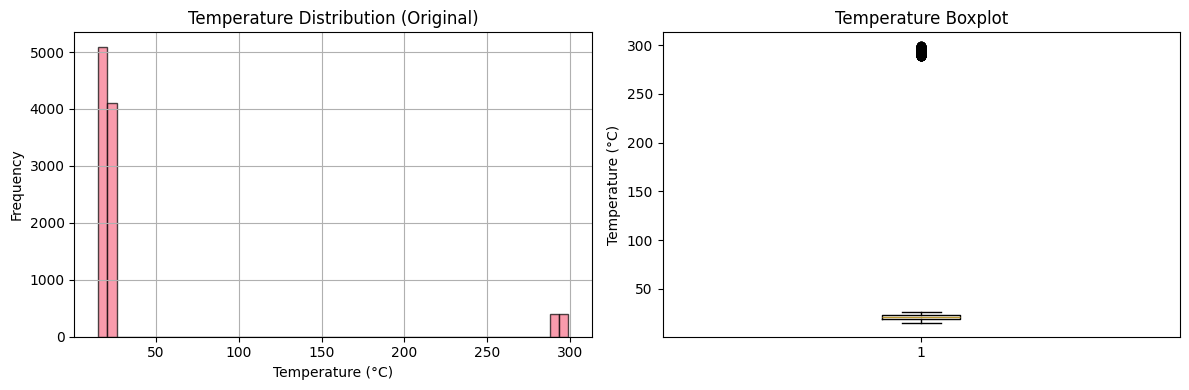

In [9]:
# Cell 11: Temperature anomaly analysis
print("Temperature anomaly analysis:")
print(f"Temperature range: {df['Temperature'].min():.2f} to {df['Temperature'].max():.2f}°C")
print(f"Temperature mean: {df['Temperature'].mean():.2f}°C")
print(f"Temperature median: {df['Temperature'].median():.2f}°C")

# Check distribution of temperature values
print(f"\nTemperature distribution:")
print(f"Values < 50°C: {(df['Temperature'] < 50).sum()} ({(df['Temperature'] < 50).mean()*100:.1f}%)")
print(f"Values 50-100°C: {((df['Temperature'] >= 50) & (df['Temperature'] < 100)).sum()}")
print(f"Values 100-200°C: {((df['Temperature'] >= 100) & (df['Temperature'] < 200)).sum()}")
print(f"Values >= 200°C: {(df['Temperature'] >= 200).sum()} ({(df['Temperature'] >= 200).mean()*100:.1f}%)")

# Sample of suspicious high values
high_temp = df[df['Temperature'] > 100]['Temperature']
print(f"\nSample of high temperature values:")
print(high_temp.head(10).tolist())

# Check if pattern suggests extra digit (divide by 10 to get normal range)
suspected_corrected = df[df['Temperature'] > 100]['Temperature'] / 10
print(f"\nIf divided by 10, high values become:")
print(suspected_corrected.head(10).tolist())
print(f"Corrected range would be: {suspected_corrected.min():.1f} to {suspected_corrected.max():.1f}°C")

# Visualize temperature distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['Temperature'].hist(bins=50, alpha=0.7, edgecolor='black')
plt.title('Temperature Distribution (Original)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['Temperature'])
plt.title('Temperature Boxplot')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

In [5]:
# Cell 5: Target variable analysis
target_col = 'Activity Level'
print(f"Target variable: {target_col}")
print(f"Classes: {df[target_col].unique()}")
print(f"\nClass distribution:")
print(df[target_col].value_counts())
print(f"\nClass proportions:")
print(df[target_col].value_counts(normalize=True) * 100)

Target variable: Activity Level
Classes: ['Low Activity' 'High Activity' 'Moderate Activity' 'ModerateActivity'
 'Low_Activity' 'LowActivity']

Class distribution:
Activity Level
Low Activity         5231
Moderate Activity    2808
High Activity        1088
ModerateActivity      307
LowActivity           293
Low_Activity          273
Name: count, dtype: int64

Class proportions:
Activity Level
Low Activity         52.31
Moderate Activity    28.08
High Activity        10.88
ModerateActivity      3.07
LowActivity           2.93
Low_Activity          2.73
Name: proportion, dtype: float64


In [10]:
# Cell 6: Feature types identification
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical features ({len(categorical_cols)}): {categorical_cols}")

print(f"\nCategorical feature details:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values - {df[col].unique()[:5]}")

Numerical features (9): ['Temperature', 'Humidity', 'CO2_InfraredSensor', 'CO2_ElectroChemicalSensor', 'MetalOxideSensor_Unit1', 'MetalOxideSensor_Unit2', 'MetalOxideSensor_Unit3', 'MetalOxideSensor_Unit4', 'Session ID']

Categorical features (5): ['Time of Day', 'CO_GasSensor', 'HVAC Operation Mode', 'Ambient Light Level', 'Activity Level']

Categorical feature details:
Time of Day: 4 unique values - ['morning' 'night' 'afternoon' 'evening']
CO_GasSensor: 5 unique values - ['medium' 'low' 'extremely low' None 'high']
HVAC Operation Mode: 23 unique values - ['off' 'ventilation_only' 'eco_mode' 'Heating_active' 'heating_active']
Ambient Light Level: 5 unique values - ['very_dim' 'bright' None 'very_bright' 'moderate']
Activity Level: 6 unique values - ['Low Activity' 'High Activity' 'Moderate Activity' 'ModerateActivity'
 'Low_Activity']


In [11]:
# Cell 12: HVAC Operation Mode inconsistency analysis
print("HVAC Operation Mode inconsistency analysis:")
print(f"Total unique values: {df['HVAC Operation Mode'].nunique()}")
print(f"All unique values:")
hvac_values = df['HVAC Operation Mode'].value_counts()
print(hvac_values)

print(f"\nGrouping by normalized values (lowercase, no spaces):")
# Create normalized version to see patterns
df_temp = df.copy()
df_temp['HVAC_normalized'] = df_temp['HVAC Operation Mode'].str.lower().str.replace('_', ' ').str.strip()
normalized_counts = df_temp['HVAC_normalized'].value_counts()
print(normalized_counts)

print(f"\nDetected HVAC categories and their variations:")
hvac_groups = {}
for value in df['HVAC Operation Mode'].dropna().unique():
   normalized = value.lower().replace('_', ' ').strip()
   if normalized not in hvac_groups:
       hvac_groups[normalized] = []
   hvac_groups[normalized].append(value)

for category, variations in hvac_groups.items():
   print(f"'{category}': {len(variations)} variations - {variations}")

print(f"\nOriginal 23 categories can be reduced to {len(hvac_groups)} standardized categories")

HVAC Operation Mode inconsistency analysis:
Total unique values: 23
All unique values:
HVAC Operation Mode
cooling_active      1504
maintenance_mode    1501
heating_active      1491
eco_mode            1437
ventilation_only    1435
off                 1429
COOLING_ACTIVE       120
OFF                  106
ECO_MODE             106
Off                  101
MAINTENANCE_MODE     101
VENTILATION_ONLY      99
HEATING_ACTIVE        88
Heating_Active        63
Ventilation_Only      53
Maintenance_Mode      51
Heating_active        49
Maintenance_mode      49
Eco_Mode              48
Eco_mode              48
Ventilation_only      42
Cooling_active        41
Cooling_Active        38
Name: count, dtype: int64

Grouping by normalized values (lowercase, no spaces):
HVAC_normalized
cooling active      1703
maintenance mode    1702
heating active      1691
eco mode            1639
off                 1636
ventilation only    1629
Name: count, dtype: int64

Detected HVAC categories and their variation

In [1]:
from src.data_preprocessing import load_and_clean_data

df_clean, preprocessor = load_and_clean_data()
print("Cleaned data summary:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Columns: {list(df_clean.columns)}")
df_clean.head()

Starting data cleaning...
Original shape: (10000, 14)
Removed 120 duplicate rows
Fixing 804 temperature anomalies (values > 100°C)
Temperature range after correction: 14.9 to 29.9°C
Fixing 269 negative values in Humidity
Fixing 22 negative values in CO2_InfraredSensor
Standardized target categories: ['Low Activity' 'High Activity' 'Moderate Activity']
New distribution:
Activity Level
Low Activity         5722
Moderate Activity    3082
High Activity        1076
Name: count, dtype: int64
HVAC categories after normalization: ['cooling active', 'eco mode', 'heating active', 'maintenance mode', 'off', 'ventilation only']
HVAC distribution:
HVAC Operation Mode
maintenance mode    1684
cooling active      1683
heating active      1666
off                 1621
eco mode            1618
ventilation only    1608
Name: count, dtype: int64
Encoded Time of Day: {'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}
Encoded CO_GasSensor: {'extremely low': 0, 'low': 1, 'medium': 2, 'high': 3, 'extre

c:\Users\User\Desktop\aiap21-NAME-NRIC\src\data_preprocessing.py:161: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
c:\Users\User\Desktop\aiap21-NAME-NRIC\src\data_preprocessing.py:161: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,Time of Day,Temperature,Humidity,CO2_InfraredSensor,CO2_ElectroChemicalSensor,MetalOxideSensor_Unit1,MetalOxideSensor_Unit2,MetalOxideSensor_Unit3,MetalOxideSensor_Unit4,CO_GasSensor,Ambient Light Level,Activity Level,HVAC_cooling active,HVAC_eco mode,HVAC_heating active,HVAC_maintenance mode,HVAC_off,HVAC_ventilation only,HVAC_nan
0,0,19.63,53.83,125.49,571.09,478.55,735.85,497.59,565.05,2.0,0.0,Low Activity,False,False,False,False,True,False,False
1,0,19.66,53.69,126.34,575.79,491.96,740.28,680.19,557.08,1.0,2.0,Low Activity,False,False,False,False,False,True,False
2,3,20.95,54.12,119.34,556.53,437.50,718.34,680.19,612.62,2.0,2.0,Low Activity,False,False,False,False,True,False,False
3,0,20.10,50.48,113.50,578.93,515.14,744.02,676.15,600.22,1.0,3.0,High Activity,False,True,False,False,False,False,False
4,0,19.89,48.42,92.77,613.65,535.66,770.27,720.27,625.73,1.0,1.0,Low Activity,False,False,True,False,False,False,False


High Multicollinearity Issues:
Metal Oxide Sensors are highly correlated with each other:

MetalOxideSensor_Unit1 & Unit4: 0.77 (very high)
MetalOxideSensor_Unit2 & Unit4: 0.60
MetalOxideSensor_Unit1 & Unit2: 0.47

This suggests these sensors may be measuring similar gas compounds or are positioned close together.
CO2 Sensors Show Expected Pattern:

CO2_InfraredSensor & CO2_ElectroChemicalSensor: -0.45 (negative correlation)
This could indicate they're measuring different aspects or one is malfunctioning

Environmental Relationships:

Time of Day correlates moderately with Temperature (0.26) and CO_GasSensor (0.26)
Temperature shows negative correlations with most metal oxide sensors (-0.36 to -0.40)

Feature Independence:

Humidity and Ambient Light Level show very low correlations with most features
These might be independent, valuable features

Implications for ML:

Feature selection needed - Metal oxide sensors are redundant
Dimensionality reduction - Consider PCA for metal oxide sensors
CO2 sensors - Investigate why they're negatively correlated
Keep diverse features - Humidity and Light Level add unique information

Bottom line: You have significant multicollinearity that will need addressing in your ML pipeline through feature selection or dimensionality reduction.

=== FEATURE CORRELATION ANALYSIS ===
Analyzing correlations for 11 numerical features


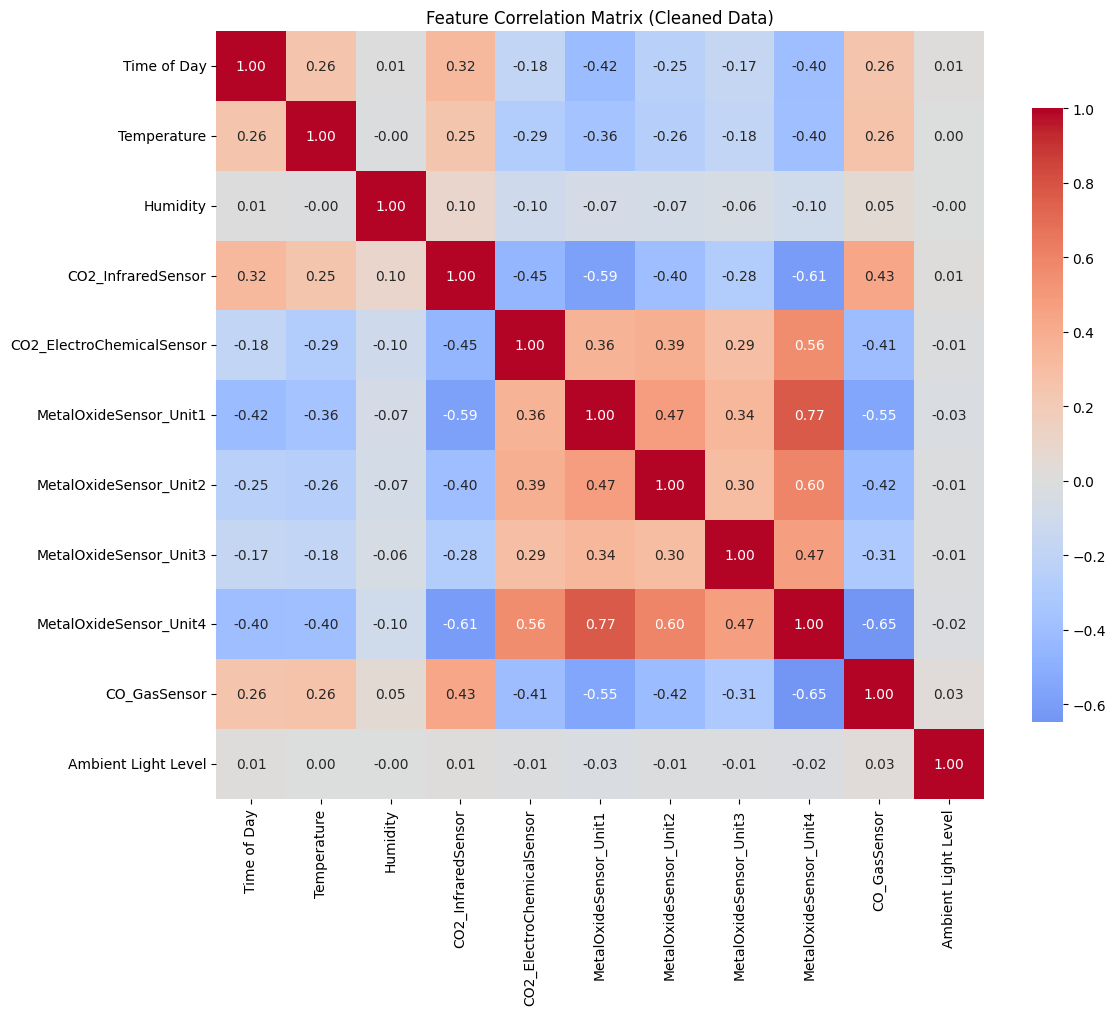


High correlation pairs (|r| > 0.7):
MetalOxideSensor_Unit1 - MetalOxideSensor_Unit4: 0.768


In [13]:
# Cell 14: Feature Correlation Analysis
print("=== FEATURE CORRELATION ANALYSIS ===")

# Get numerical features only
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"Analyzing correlations for {len(numerical_features)} numerical features")

# Correlation matrix
correlation_matrix = df_clean[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix (Cleaned Data)')
plt.tight_layout()
plt.show()

# Identify high correlations (potential multicollinearity)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print(f"\nHigh correlation pairs (|r| > 0.7):")
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} - {col2}: {corr:.3f}")

Strong Predictive Features:
MetalOxideSensor_Unit4 (0.308) - strongest predictor

Higher readings → Higher activity levels
This sensor seems most sensitive to human activity

CO2_ElectroChemicalSensor (0.268) - second strongest

Higher CO2 → Higher activity (makes sense - more people/activity = more CO2)

Inverse Relationships:
CO_GasSensor (-0.229) - strong negative correlation

Higher CO levels → Lower activity (concerning - could indicate health issues)

CO2_InfraredSensor (-0.189) - negative correlation

Interesting contrast with the electrochemical CO2 sensor (positive correlation)
Suggests these sensors may be measuring different aspects or one has calibration issues

Temperature (-0.162) - moderate negative

Higher temps → Lower activity (people less active when hot?)

Weak Predictors:
Humidity (-0.007) and Ambient Light Level (0.003) - essentially no correlation

These features might not be useful for activity prediction
Could be dropped or used only in ensemble methods

Key Insights for ML:

Metal oxide sensors are your best predictors (especially Unit4)
CO2 sensors tell different stories - investigate this discrepancy
CO levels inversely related to activity - important health signal
Environmental factors (humidity, light) are poor predictors
Feature selection should prioritize metal oxide and CO2 sensors

This suggests your models should focus heavily on gas sensor readings rather than environmental conditions.


=== TARGET VARIABLE RELATIONSHIPS ===
Feature correlations with Activity Level:
MetalOxideSensor_Unit4: 0.308
CO2_ElectroChemicalSensor: 0.268
CO_GasSensor: -0.229
MetalOxideSensor_Unit1: 0.207
MetalOxideSensor_Unit2: 0.194
CO2_InfraredSensor: -0.189
MetalOxideSensor_Unit3: 0.167
Temperature: -0.162
Time of Day: -0.092
Humidity: -0.007
Ambient Light Level: 0.003


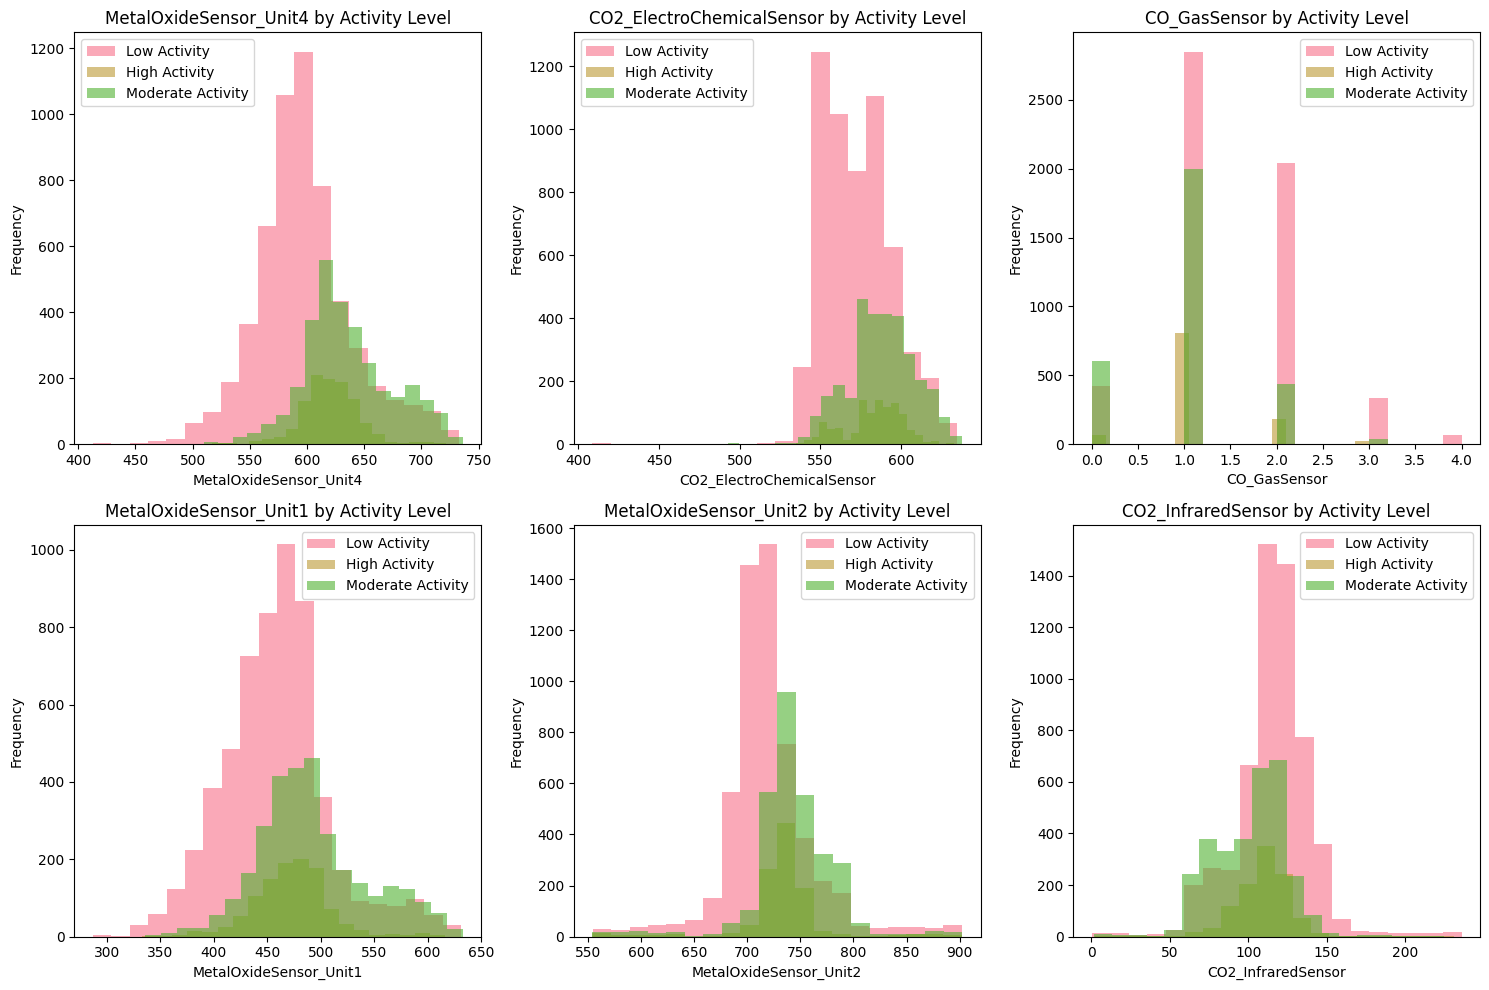

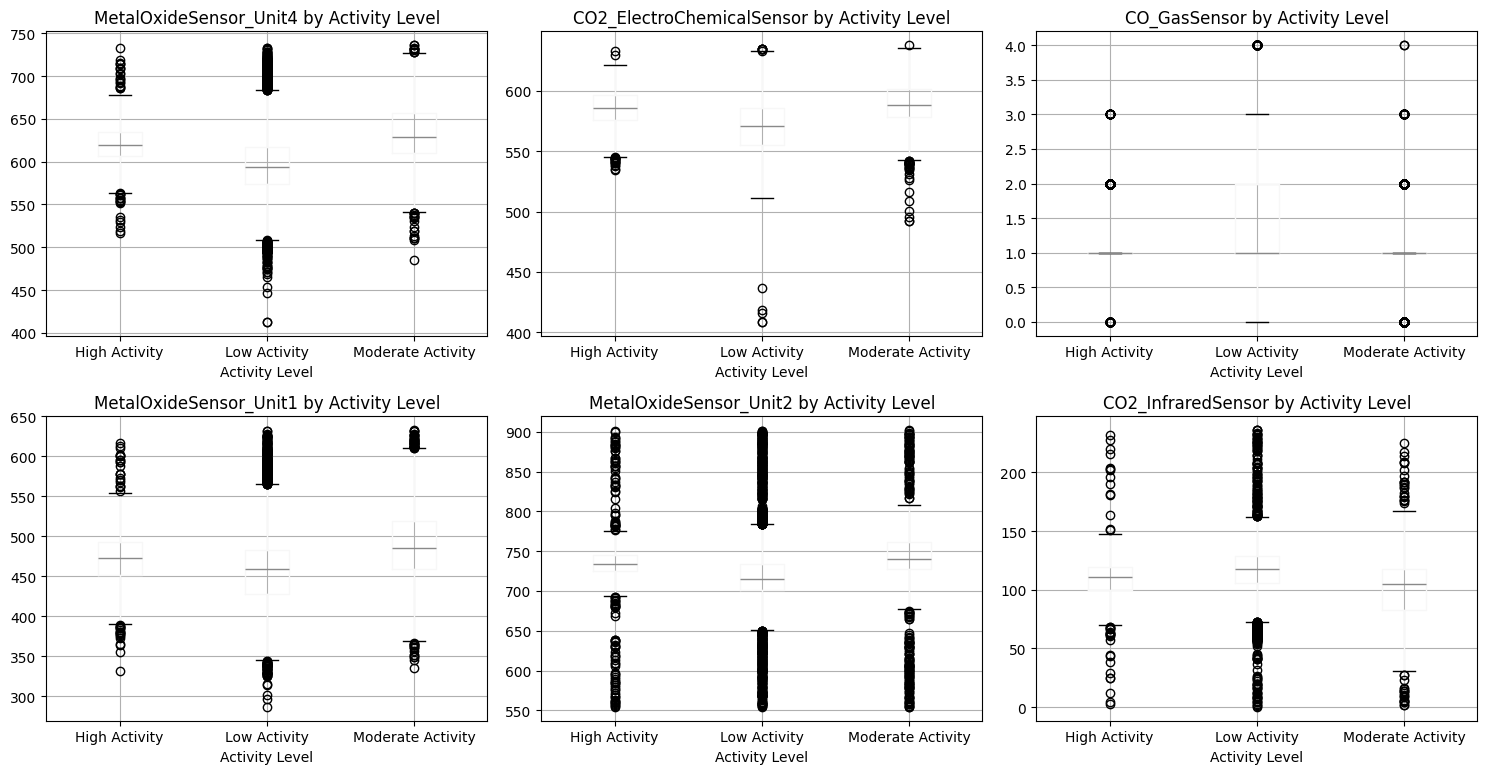


Statistical summary by Activity Level:
                  MetalOxideSensor_Unit4        CO2_ElectroChemicalSensor  \
                                    mean    std                      mean   
Activity Level                                                              
High Activity                     620.17  24.73                    583.06   
Low Activity                      598.01  41.92                    572.37   
Moderate Activity                 635.28  38.60                    587.99   

                         CO_GasSensor       MetalOxideSensor_Unit1         \
                     std         mean   std                   mean    std   
Activity Level                                                              
High Activity      17.60         1.14  0.53                 472.44  34.94   
Low Activity       21.25         1.44  0.76                 458.30  50.02   
Moderate Activity  20.42         0.97  0.63                 492.31  51.39   

                  MetalOxideSensor

In [14]:
# Cell 15: Target Variable Relationships
print("\n=== TARGET VARIABLE RELATIONSHIPS ===")

# Convert target to numeric for correlation
target_mapping = {'Low Activity': 0, 'Moderate Activity': 1, 'High Activity': 2}
df_clean['Activity_Numeric'] = df_clean['Activity Level'].map(target_mapping)

# Calculate correlations with target
target_correlations = df_clean[numerical_features + ['Activity_Numeric']].corr()['Activity_Numeric'].drop('Activity_Numeric')
target_correlations = target_correlations.sort_values(key=abs, ascending=False)

print("Feature correlations with Activity Level:")
for feature, corr in target_correlations.items():
    print(f"{feature}: {corr:.3f}")

# Visualize top correlated features with target
top_features = target_correlations.head(6).index.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    ax = axes[i]
    for activity in df_clean['Activity Level'].unique():
        subset = df_clean[df_clean['Activity Level'] == activity]
        ax.hist(subset[feature], alpha=0.6, label=activity, bins=20)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{feature} by Activity Level')
    ax.legend()

plt.tight_layout()
plt.show()

# Box plots for top features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    df_clean.boxplot(column=feature, by='Activity Level', ax=plt.gca())
    plt.title(f'{feature} by Activity Level')
    plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Statistical summary by activity level
print("\nStatistical summary by Activity Level:")
summary_stats = df_clean.groupby('Activity Level')[top_features].agg(['mean', 'std'])
print(summary_stats.round(2))

=== RANDOM FOREST PIPELINE ===
Selected features based on EDA: ['MetalOxideSensor_Unit4', 'CO2_ElectroChemicalSensor', 'CO_GasSensor', 'CO2_InfraredSensor', 'Temperature', 'Time of Day']
Data prepared: 6 features, 9880 samples
Target distribution:
Activity Level
Low Activity         5722
Moderate Activity    3082
High Activity        1076
Name: count, dtype: int64
Data split - Train: (7904, 6), Test: (1976, 6)
Training Random Forest...
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.6738

Evaluating Random Forest...
Accuracy: 0.6746
F1-Score (weighted): 0.6586
F1-Score (macro): 0.5305

Classification Report:
                   precision    recall  f1-score   support

    High Activity       0.48      0.14      0.22       215
     Low Activity       0.76      0.79      0.78      1145
Moderate Activity       0.55      0.65      0.59       616

         accuracy                           0.67      1976
        macro avg       0.60      0.53

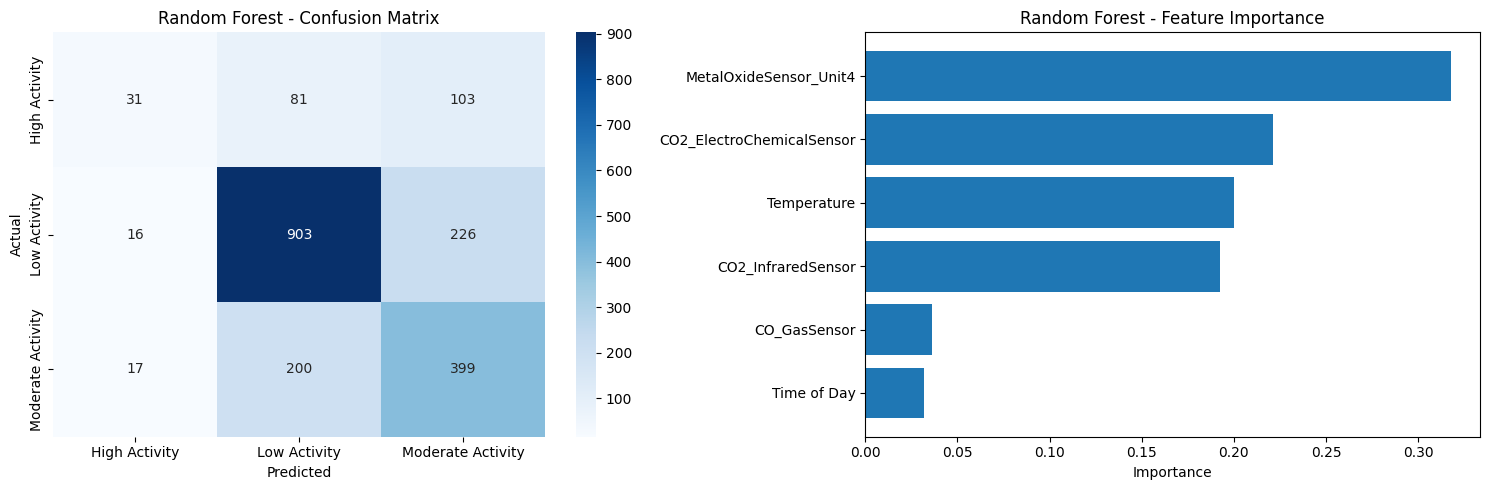

Model saved to models/random_forest.pkl

=== RANDOM FOREST SUMMARY ===
Selected Features: ['MetalOxideSensor_Unit4', 'CO2_ElectroChemicalSensor', 'CO_GasSensor', 'CO2_InfraredSensor', 'Temperature', 'Time of Day']
Test Accuracy: 0.6746
F1-Score (weighted): 0.6586
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [3]:
# Cell 17: Run Random Forest
from src.random_forest_model import run_random_forest_pipeline

model, results = run_random_forest_pipeline(df_clean)

In [ ]:
# Cell 7: Export data for manual inspection
df.to_csv('data/gas_monitoring_data.csv', index=False)
print(f"Data exported to 'data/gas_monitoring_data.csv'")
print(f"\nSample of exported data:")
df.head(10)